# Model Evaluation

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import h5py
import io
import json
import time

import matplotlib.pyplot as plt
import seaborn as sns

2021-07-24 15:41:51.801987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-24 15:41:51.802062: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Define Parameters

In [2]:
# Model Paramaters (Should be the same when training the model)
vocab_size = 30000
embedding_dim = 16
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

### Load Data

In [3]:
data = pd.read_csv("./ProcessedData.csv")

data = data.drop(columns=["Unnamed: 0"])
X = list(data.tweet) # X => Sentence
Y = list(data.label) # Y => Sentiment

In [4]:
# 0 -> Negative, 1 -> Positive
Y = [1 if i!=0 else i for i in Y]

### Load Model

In [5]:
# Load Model
model = tf.keras.models.load_model('./TrainedModel/SentimentModel01.h5')

2021-07-24 15:41:59.252275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-24 15:41:59.252357: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-24 15:41:59.252391: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PREDATOR): /proc/driver/nvidia/version does not exist
2021-07-24 15:41:59.252679: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Load Tokenizer
with open('./TrainedModel/tokenizer.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

### Get Model Predictions

In [7]:
def predictSentiment(x):
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    return model.predict(padded)

In [8]:
Y_Pred = predictSentiment(X)

2021-07-24 15:42:40.083082: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1280000000 exceeds 10% of free system memory.
2021-07-24 15:42:40.793101: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-24 15:42:40.793683: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2208005000 Hz


In [9]:
# Format Y_Pred from score (0 to 1) to category ("POSITIVE" or "NEGATIVE")
# 0 -> Negative, 1 -> Positive
Y_Pred = ["POSITIVE" if i > 0.5 else "NEGATIVE" for i in Y_Pred]

In [10]:
# Change numbers to labels
Y = ["POSITIVE" if i == 1 else "NEGATIVE" for i in Y]

### Confusion Matrix

In [11]:
# Making a Confusion Matrix
conMat = confusion_matrix(Y, Y_Pred)

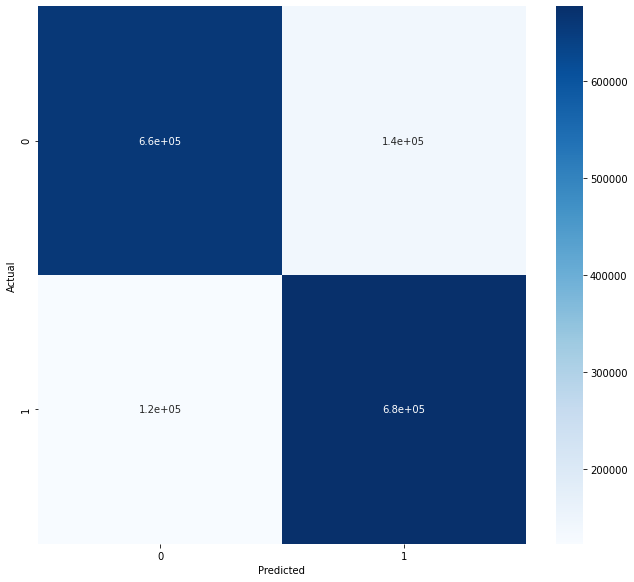

In [12]:
# Visualize Confusion Matrix
figure = plt.figure(figsize=(9, 8))
sns.heatmap(conMat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Model Report

In [13]:
print(classification_report(y_true = Y, y_pred = Y_Pred))

              precision    recall  f1-score   support

    NEGATIVE       0.84      0.82      0.83    800000
    POSITIVE       0.83      0.85      0.84    800000

    accuracy                           0.83   1600000
   macro avg       0.83      0.83      0.83   1600000
weighted avg       0.83      0.83      0.83   1600000



In [14]:
conMat

array([[658648, 141352],
       [123234, 676766]])